# 김가네 팀플 (4) 데이터 분석 (군집화)_ 230622
- 팀원 별로 분담해서 분석 진행
- 워드클라우드 시각화 완료
- 군집화 진행

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
pd.set_option('mode.chained_assignment',  None)

In [4]:
# 전처리 완료된 데이터 파일 불러오기
CS = pd.read_csv('../data/CS.csv', encoding='euc-kr')
CS.info()
CS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20624 entries, 0 to 20623
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   view_cnt       20624 non-null  int64
 1   where_cnt      20624 non-null  int64
 2   attend_cnt     20624 non-null  int64
 3   volunteer_cnt  20624 non-null  int64
 4   history_cnt    20624 non-null  int64
 5   festival_cnt   20624 non-null  int64
 6   standard       20624 non-null  int64
 7   block          20624 non-null  int64
 8   expense        20624 non-null  int64
 9   expense_f      20624 non-null  int64
 10  difficulty     20624 non-null  int64
 11  intention      20624 non-null  int64
 12  history        20624 non-null  int64
 13  history_f      20624 non-null  int64
 14  festival       20624 non-null  int64
 15  festival_f     20624 non-null  int64
 16  sex            20624 non-null  int64
 17  age            20624 non-null  int64
 18  education      20624 non-null  int64
 19  marr

,view_cnt,where_cnt,attend_cnt,volunteer_cnt,history_cnt,festival_cnt,standard,block,expense,expense_f,...,festival,festival_f,sex,age,education,married,work,income,sido,disabled
0,49,0,0,0,5,0,1,1,14,14,...,2,6,2,5,3,1,5,3,1,1
1,3,3,3,0,1,0,2,6,14,9,...,2,7,2,5,3,2,5,7,1,1
2,6,0,0,0,0,0,2,1,8,15,...,2,4,1,2,3,1,5,6,1,1
3,22,12,2,0,0,0,1,2,14,14,...,2,5,2,4,4,2,5,5,1,1
4,16,3,2,0,2,0,2,1,14,14,...,2,4,2,3,4,1,1,3,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20619,59,7,0,0,5,1,4,3,12,12,...,1,6,2,4,4,2,1,6,1,1
20620,49,6,0,0,2,1,1,2,12,12,...,1,6,2,3,4,2,5,4,1,1
20621,4,0,0,0,0,0,1,2,17,12,...,2,4,1,5,4,2,2,6,1,1
20622,58,5,0,0,0,2,1,2,12,12,...,1,6,2,4,4,2,5,5,1,1


## 군집화 진행

### K-Modes 군집화 알고리즘 사용

In [5]:
# K-Modes 패키지 설치
# !pip install kmodes

In [6]:
# K-Modes 모듈 import
from kmodes.kmodes import KModes

## 군집화를 위한 데이터 전처리
- 연령대는 50-60대(시니어)만 필터링
- 시도는 서울특별시-경기도(수도권)만 필터링
- 장애등록여부 제외
- 종사상 지위 제외

### 코드 기준 축소
- expense열과 expense_f열 카테고리가 너무 많은 것을 우려,  
- 같은 분야별로 코드 기준 축소

In [7]:
# 군집화를 위한 데이터프레임 추출
CS_clustering = CS[['view_cnt', 'expense', 'expense_f', 'sex', 'age', 'education', 'married', 'work', 'income', 'sido']]

CS_clustering

,view_cnt,expense,expense_f,sex,age,education,married,work,income,sido
0,49,14,14,2,5,3,1,5,3,1
1,3,14,9,2,5,3,2,5,7,1
2,6,8,15,1,2,3,1,5,6,1
3,22,14,14,2,4,4,2,5,5,1
4,16,14,14,2,3,4,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...
20619,59,12,12,2,4,4,2,1,6,1
20620,49,12,12,2,3,4,2,5,4,1
20621,4,17,12,1,5,4,2,2,6,1
20622,58,12,12,2,4,4,2,5,5,1


### 비용 지출 관련 2개 열 코드 기준 축소
- expense : 과거에 지출했던 문화예술행사 분야
- expense_f : 미래에 지출할 의향이 있는 분야

#### 변경된 카테고리 info
- 1 : '문학/미술'
- 2 : '서양음악'
- 3 : '전통예술'
- 4 : '연극/뮤지컬'
- 5 : '무용'
- 6 : '영화'
- 7 : '대중음악'
- 8 : '기타'
- 9 : '해당사항없음'


In [8]:
# 축소 전 코드 기준
expense_words = {
    1:'문학',
    2:'미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'전시회',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

In [9]:
# 바꿀 코드 기준
expense_newctg = {
    1:'문학/미술',
    2:'문학/미술',
    3:'서양음악',
    4:'전통예술',
    5:'연극/뮤지컬',
    6:'무용',
    7:'영화',
    8:'대중음악',
    9:'문학/미술',
    10:'서양음악',
    11:'전통예술',
    12:'연극/뮤지컬',
    13:'무용',
    14:'영화',
    15:'대중음악',
    16:'기타',
    17:'해당사항없음'
}

In [10]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'expense',
    'expense_f'
]

In [11]:
# 코드값 변경이 필요한 열들의 변경 전 빈도값 출력
for column in need_setting_columns:
    CS_clustering[column].value_counts(ascending=False)

expense
14    5771
17    5233
12    4786
5     1081
15     747
1      706
8      560
7      511
11     248
9      238
13     201
16     189
2       89
10      87
6       67
4       65
3       45
Name: count, dtype: int64

expense_f
12    5837
14    4724
15    2161
17    1801
1      876
5      780
9      745
11     740
13     687
8      570
16     459
7      440
10     297
6      166
4      135
2      129
3       77
Name: count, dtype: int64

In [12]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [expense_newctg, expense_newctg]

In [13]:
# 코드 변경 함수 선언
def get_list_setting_column(column, setting_prev_next):
    setting_done_list = []
    
    for code_value in column:
        setting_done_list.append(setting_prev_next[code_value])
    
    return setting_done_list

In [14]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_clustering[column] = get_list_setting_column(CS_clustering[column], setting_codes[i])

In [15]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_clustering[column].value_counts(ascending=False)

expense
영화        6282
연극/뮤지컬    5867
해당사항없음    5233
대중음악      1307
문학/미술     1033
전통예술       313
무용         268
기타         189
서양음악       132
Name: count, dtype: int64

expense_f
연극/뮤지컬    6617
영화        5164
대중음악      2731
해당사항없음    1801
문학/미술     1750
전통예술       875
무용         853
기타         459
서양음악       374
Name: count, dtype: int64

### 머신러닝 학습을 위해 문자형 기준을 다시 수치형으로 변경!!
- '문학/미술' : 1
- '서양음악' : 2
- '전통예술' : 3
- '연극/뮤지컬' : 4
- '무용' : 5
- '영화' : 6
- '대중음악' : 7
- '기타' : 8
- '해당사항없음' : 9

In [16]:
# 코드 변경이 필요한 열 이름
need_setting_columns = [
    'expense',
    'expense_f'
]

In [17]:
# 다시 수치형으로 바꿀 코드 기준
expense_newctg_final = {
    '문학/미술' : 1,
    '서양음악' : 2,
    '전통예술' : 3,
    '연극/뮤지컬' : 4,
    '무용' : 5,
    '영화' : 6,
    '대중음악' : 7,
    '기타' : 8,
    '해당사항없음' : 9
}

In [18]:
# 위에서 만들어준 딕셔너리 하나의 리스트로 묶기
setting_codes = [expense_newctg_final, expense_newctg_final]

In [19]:
# 코드 변경이 필요한 모든 열에 대해 코드 변경
for i, column in enumerate(need_setting_columns):
    CS_clustering[column] = get_list_setting_column(CS_clustering[column], setting_codes[i])

In [20]:
# 코드값 변경이 필요한 열들의 변경 후 빈도값 출력
for column in need_setting_columns:
    CS_clustering[column].value_counts(ascending=False)

expense
6    6282
4    5867
9    5233
7    1307
1    1033
3     313
5     268
8     189
2     132
Name: count, dtype: int64

expense_f
4    6617
6    5164
7    2731
9    1801
1    1750
3     875
5     853
8     459
2     374
Name: count, dtype: int64

In [21]:
# 범주 축소 완료된 데이터프레임 확인
CS_clustering

,view_cnt,expense,expense_f,sex,age,education,married,work,income,sido
0,49,6,6,2,5,3,1,5,3,1
1,3,6,1,2,5,3,2,5,7,1
2,6,7,7,1,2,3,1,5,6,1
3,22,6,6,2,4,4,2,5,5,1
4,16,6,6,2,3,4,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...
20619,59,4,4,2,4,4,2,1,6,1
20620,49,4,4,2,3,4,2,5,4,1
20621,4,9,4,1,5,4,2,2,6,1
20622,58,4,4,2,4,4,2,5,5,1


### 'sido', 'age' 제외하기

In [22]:
CS_clustering = CS_clustering.drop(columns=['sido', 'age'], axis=1)

CS_clustering

,view_cnt,expense,expense_f,sex,education,married,work,income
0,49,6,6,2,3,1,5,3
1,3,6,1,2,3,2,5,7
2,6,7,7,1,3,1,5,6
3,22,6,6,2,4,2,5,5
4,16,6,6,2,4,1,1,3
...,...,...,...,...,...,...,...,...
20619,59,4,4,2,4,2,1,6
20620,49,4,4,2,4,2,5,4
20621,4,9,4,1,4,2,2,6
20622,58,4,4,2,4,2,5,5


---
# 군집화 적용

In [23]:
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from kmodes.kprototypes import KPrototypes

In [24]:
def visualize_silhouette(cluster_lists, X_features):  
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KModes 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
#         clusterer = KModes(n_clusters = n_cluster, n_init=10,  max_iter=500, random_state=0)

#         clusterer = KMeans(n_clusters = n_cluster, n_init=10,  max_iter=500, random_state=0)
#         cluster_labels = clusterer.fit_predict(X_features)
        clusterer = KPrototypes(n_clusters = n_cluster, n_init=10,  max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features, categorical=[1,2,3,4,5,6])
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [25]:
CS5 = CS_clustering.copy()

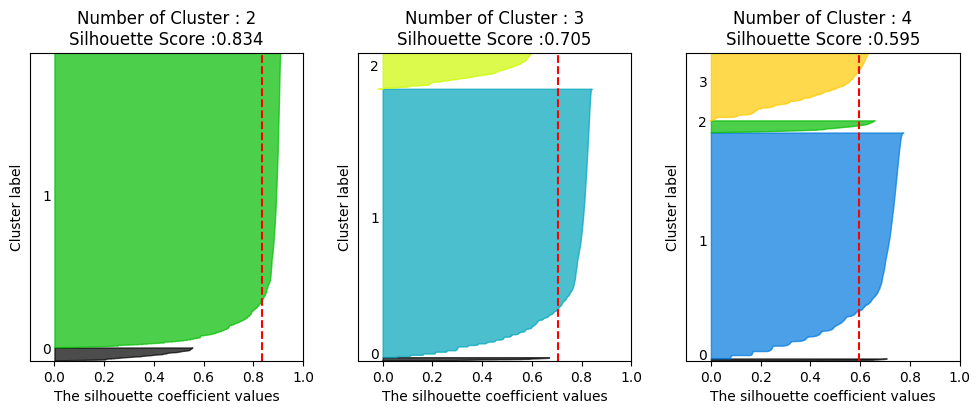

In [26]:
# KPrototypes 군집화 - 실루엣 스코어 시각화
visualize_silhouette([2, 3, 4], CS5)

In [28]:
CS5 = CS5[(CS5['age']==5) | (CS5['age']==6)]
CS5

KeyError: 'age'

In [29]:
CS5 = CS5.drop(columns=['sido', 'work'])
CS5

KeyError: "['sido'] not found in axis"

In [30]:
# KPrototype 군집화 (K=3)
clusterer = KPrototypes(n_clusters = 3, n_init=10,  max_iter=500, random_state=0)
cluster_labels = clusterer.fit_predict(CS5, categorical=[1,2,3,4,5,6,7])
CS5['cluster_3'] = cluster_labels
CS5

,view_cnt,expense,expense_f,sex,education,married,work,income,cluster_3
0,49,6,6,2,3,1,5,3,2
1,3,6,1,2,3,2,5,7,1
2,6,7,7,1,3,1,5,6,1
3,22,6,6,2,4,2,5,5,1
4,16,6,6,2,4,1,1,3,1
...,...,...,...,...,...,...,...,...,...
20619,59,4,4,2,4,2,1,6,2
20620,49,4,4,2,4,2,5,4,2
20621,4,9,4,1,4,2,2,6,1
20622,58,4,4,2,4,2,5,5,2


In [ ]:
# 0번 군집의 문화예술행사 관람횟수
CS5[CS5['cluster_3']==0][['view_cnt']].min()
CS5[CS5['cluster_3']==0][['view_cnt']].max()
CS5[CS5['cluster_3']==0][['view_cnt']].mean()

In [ ]:
# 1번 군집의 문화예술행사 관람횟수
CS5[CS5['cluster_3']==1][['view_cnt']].min()
CS5[CS5['cluster_3']==1][['view_cnt']].max()
CS5[CS5['cluster_3']==1][['view_cnt']].mean()

In [ ]:
# 2번 군집의 문화예술행사 관람횟수
CS5[CS5['cluster_3']==2][['view_cnt']].min()
CS5[CS5['cluster_3']==2][['view_cnt']].max()
CS5[CS5['cluster_3']==2][['view_cnt']].mean()

In [ ]:
# KPrototype 엘보우 커브 시각화
cost = []
K = range(1, 6)
for num in K:
    kprototype = KPrototypes(n_clusters = num, n_init=10,  max_iter=500, random_state=0)
    kprototype.fit_predict(CS5, categorical=[1,2,3,4,5,6,7])
    cost.append(kprototype.cost_)

plt.plot(K, cost, 'bx-')
plt.xlabel('number of clusters')
plt.ylabel('cost')
plt.title('elbow method for finding optimal K')
plt.show()

### 군집 별 특성 파악

In [ ]:
from matplotlib import rc
rc('font', family='AppleGothic')

In [ ]:
# 1번 군집의 가장 많이 지출한 항목(expense) 특성 파악
df_1 = CS5[CS5['cluster_3']==1][['expense']].value_counts().to_frame().sort_index()
df_1 = df_1.loc[[12,14,15]]
df_1.index = ['연극/뮤지컬', '영화', '대중음악']
df_1.plot(kind='barh', grid=True, figsize=(5,5), color='lightgreen')
plt.title('1번 군집의 가장 많이 지출한 문화예술분야')
plt.xticks(rotation='horizontal')

In [ ]:
# 2번 군집의 가장 많이 지출한 항목(expense) 특성 파악
df_2 = CS5[CS5['cluster_3']==2][['expense']].value_counts().to_frame().sort_index()
df_2 = df_2.loc[[12,14,15]]
df_2.index = ['연극/뮤지컬', '영화', '대중음악']
df_2.plot(kind='barh', grid=True, figsize=(5,5), color='lightgreen')
plt.xticks(rotation='horizontal')

In [ ]:
# 0번 군집의 가장 많이 지출한 항목(expense) 특성 파악
df_0 = CS5[CS5['cluster_3']==0][['expense']].value_counts().to_frame().sort_index()
df_0 = df_0.loc[[12,14,15]]
df_0.index = ['연극/뮤지컬', '영화', '대중음악']
df_0.plot(kind='barh', grid=True, figsize=(5,5), color='lightgreen')
plt.title('0번 군집의 가장 많이 지출한 문화예술분야')
plt.xticks(rotation='horizontal')